> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   **Classical acGAN in offline settings**
*   Classical acGAN in online settings
*   acGAN with join retrain
*   acGAN with replay alignment


In [1]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [2]:
config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    channels=1,
    n_epochs=30,
    batch_size=64,
    embedding=100, # latent dimension of embedding
    lr_g=0.0002, # Learning rate for generator
    lr_d=0.0002 # Learning rate for discriminator
)

## Classical acGAN in offline settings (training)
As a first step, we create a classical acGAN in offline setting, where all digits are learned at the same time.
In this setting, we have only one experience that contains all digits.

In [3]:
experiences = [[0,1,2,3,4,5,6,7,8,9]] # list of experiences
exp_generator = custom_mnist(experiences = experiences)
trainer = Trainer(config=config)
history = trainer.fit_classic(experiences=exp_generator, create_gif=False)

Dataset found...
Experience --  1 numbers [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 938/938 [00:21<00:00, 43.92it/s]


[1/30] Loss_D: 1.1785 Loss_G: 1.2998 Acc 0.796875


100%|██████████| 938/938 [00:19<00:00, 47.81it/s]


[2/30] Loss_D: 1.0556 Loss_G: 1.2226 Acc 0.890625


100%|██████████| 938/938 [00:19<00:00, 47.70it/s]


[3/30] Loss_D: 1.0819 Loss_G: 1.2009 Acc 0.937500


100%|██████████| 938/938 [00:19<00:00, 47.59it/s]


[4/30] Loss_D: 1.0954 Loss_G: 1.0893 Acc 0.953125


100%|██████████| 938/938 [00:19<00:00, 47.27it/s]


[5/30] Loss_D: 1.1194 Loss_G: 1.1593 Acc 0.937500


100%|██████████| 938/938 [00:19<00:00, 47.03it/s]


[6/30] Loss_D: 1.1102 Loss_G: 1.1136 Acc 0.968750


100%|██████████| 938/938 [00:19<00:00, 47.35it/s]


[7/30] Loss_D: 1.0136 Loss_G: 1.1750 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.36it/s]


[8/30] Loss_D: 1.0705 Loss_G: 1.1718 Acc 0.937500


100%|██████████| 938/938 [00:19<00:00, 47.56it/s]


[9/30] Loss_D: 1.0638 Loss_G: 1.0883 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.32it/s]


[10/30] Loss_D: 1.1038 Loss_G: 1.0603 Acc 0.968750


100%|██████████| 938/938 [00:19<00:00, 47.57it/s]


[11/30] Loss_D: 1.0819 Loss_G: 1.0206 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.57it/s]


[12/30] Loss_D: 1.1019 Loss_G: 1.0334 Acc 0.953125


100%|██████████| 938/938 [00:19<00:00, 47.59it/s]


[13/30] Loss_D: 1.0952 Loss_G: 1.1037 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.56it/s]


[14/30] Loss_D: 1.1026 Loss_G: 1.0264 Acc 0.953125


100%|██████████| 938/938 [00:19<00:00, 47.54it/s]


[15/30] Loss_D: 1.1111 Loss_G: 1.1226 Acc 0.984375


100%|██████████| 938/938 [00:20<00:00, 46.89it/s]


[16/30] Loss_D: 1.0665 Loss_G: 1.1001 Acc 0.968750


100%|██████████| 938/938 [00:19<00:00, 47.48it/s]


[17/30] Loss_D: 1.0732 Loss_G: 1.1012 Acc 0.968750


100%|██████████| 938/938 [00:19<00:00, 47.48it/s]


[18/30] Loss_D: 1.0712 Loss_G: 1.0959 Acc 1.000000


100%|██████████| 938/938 [00:19<00:00, 47.21it/s]


[19/30] Loss_D: 1.0665 Loss_G: 1.1118 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.52it/s]


[20/30] Loss_D: 1.1058 Loss_G: 1.1529 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.45it/s]


[21/30] Loss_D: 1.0917 Loss_G: 1.0813 Acc 1.000000


100%|██████████| 938/938 [00:19<00:00, 47.51it/s]


[22/30] Loss_D: 1.0607 Loss_G: 1.1693 Acc 1.000000


100%|██████████| 938/938 [00:22<00:00, 41.16it/s]


[23/30] Loss_D: 1.0681 Loss_G: 1.1222 Acc 1.000000


100%|██████████| 938/938 [00:23<00:00, 39.84it/s]


[24/30] Loss_D: 0.9986 Loss_G: 1.2482 Acc 1.000000


100%|██████████| 938/938 [00:19<00:00, 47.25it/s]


[25/30] Loss_D: 1.0506 Loss_G: 1.0938 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.30it/s]


[26/30] Loss_D: 1.1293 Loss_G: 1.1564 Acc 0.968750


100%|██████████| 938/938 [00:19<00:00, 47.32it/s]


[27/30] Loss_D: 1.1336 Loss_G: 1.1057 Acc 0.984375


100%|██████████| 938/938 [00:19<00:00, 47.16it/s]


[28/30] Loss_D: 1.1044 Loss_G: 1.0250 Acc 1.000000


100%|██████████| 938/938 [00:19<00:00, 47.33it/s]


[29/30] Loss_D: 1.0471 Loss_G: 1.1797 Acc 0.968750


100%|██████████| 938/938 [00:19<00:00, 47.44it/s]

[30/30] Loss_D: 1.1645 Loss_G: 1.0855 Acc 1.000000


## Loss functions and Accuracy

The charts below represent the *loss function* for both Generator and Discriminator. Since the GAN architecture is based on Min-Max optimization, the loss functions are not smooth but irregular. Generally, finding an optimal parametrization is really hard for this kind of architecture. We relied on the original paper for the **learning rate** and **batch_size** (linked in above).

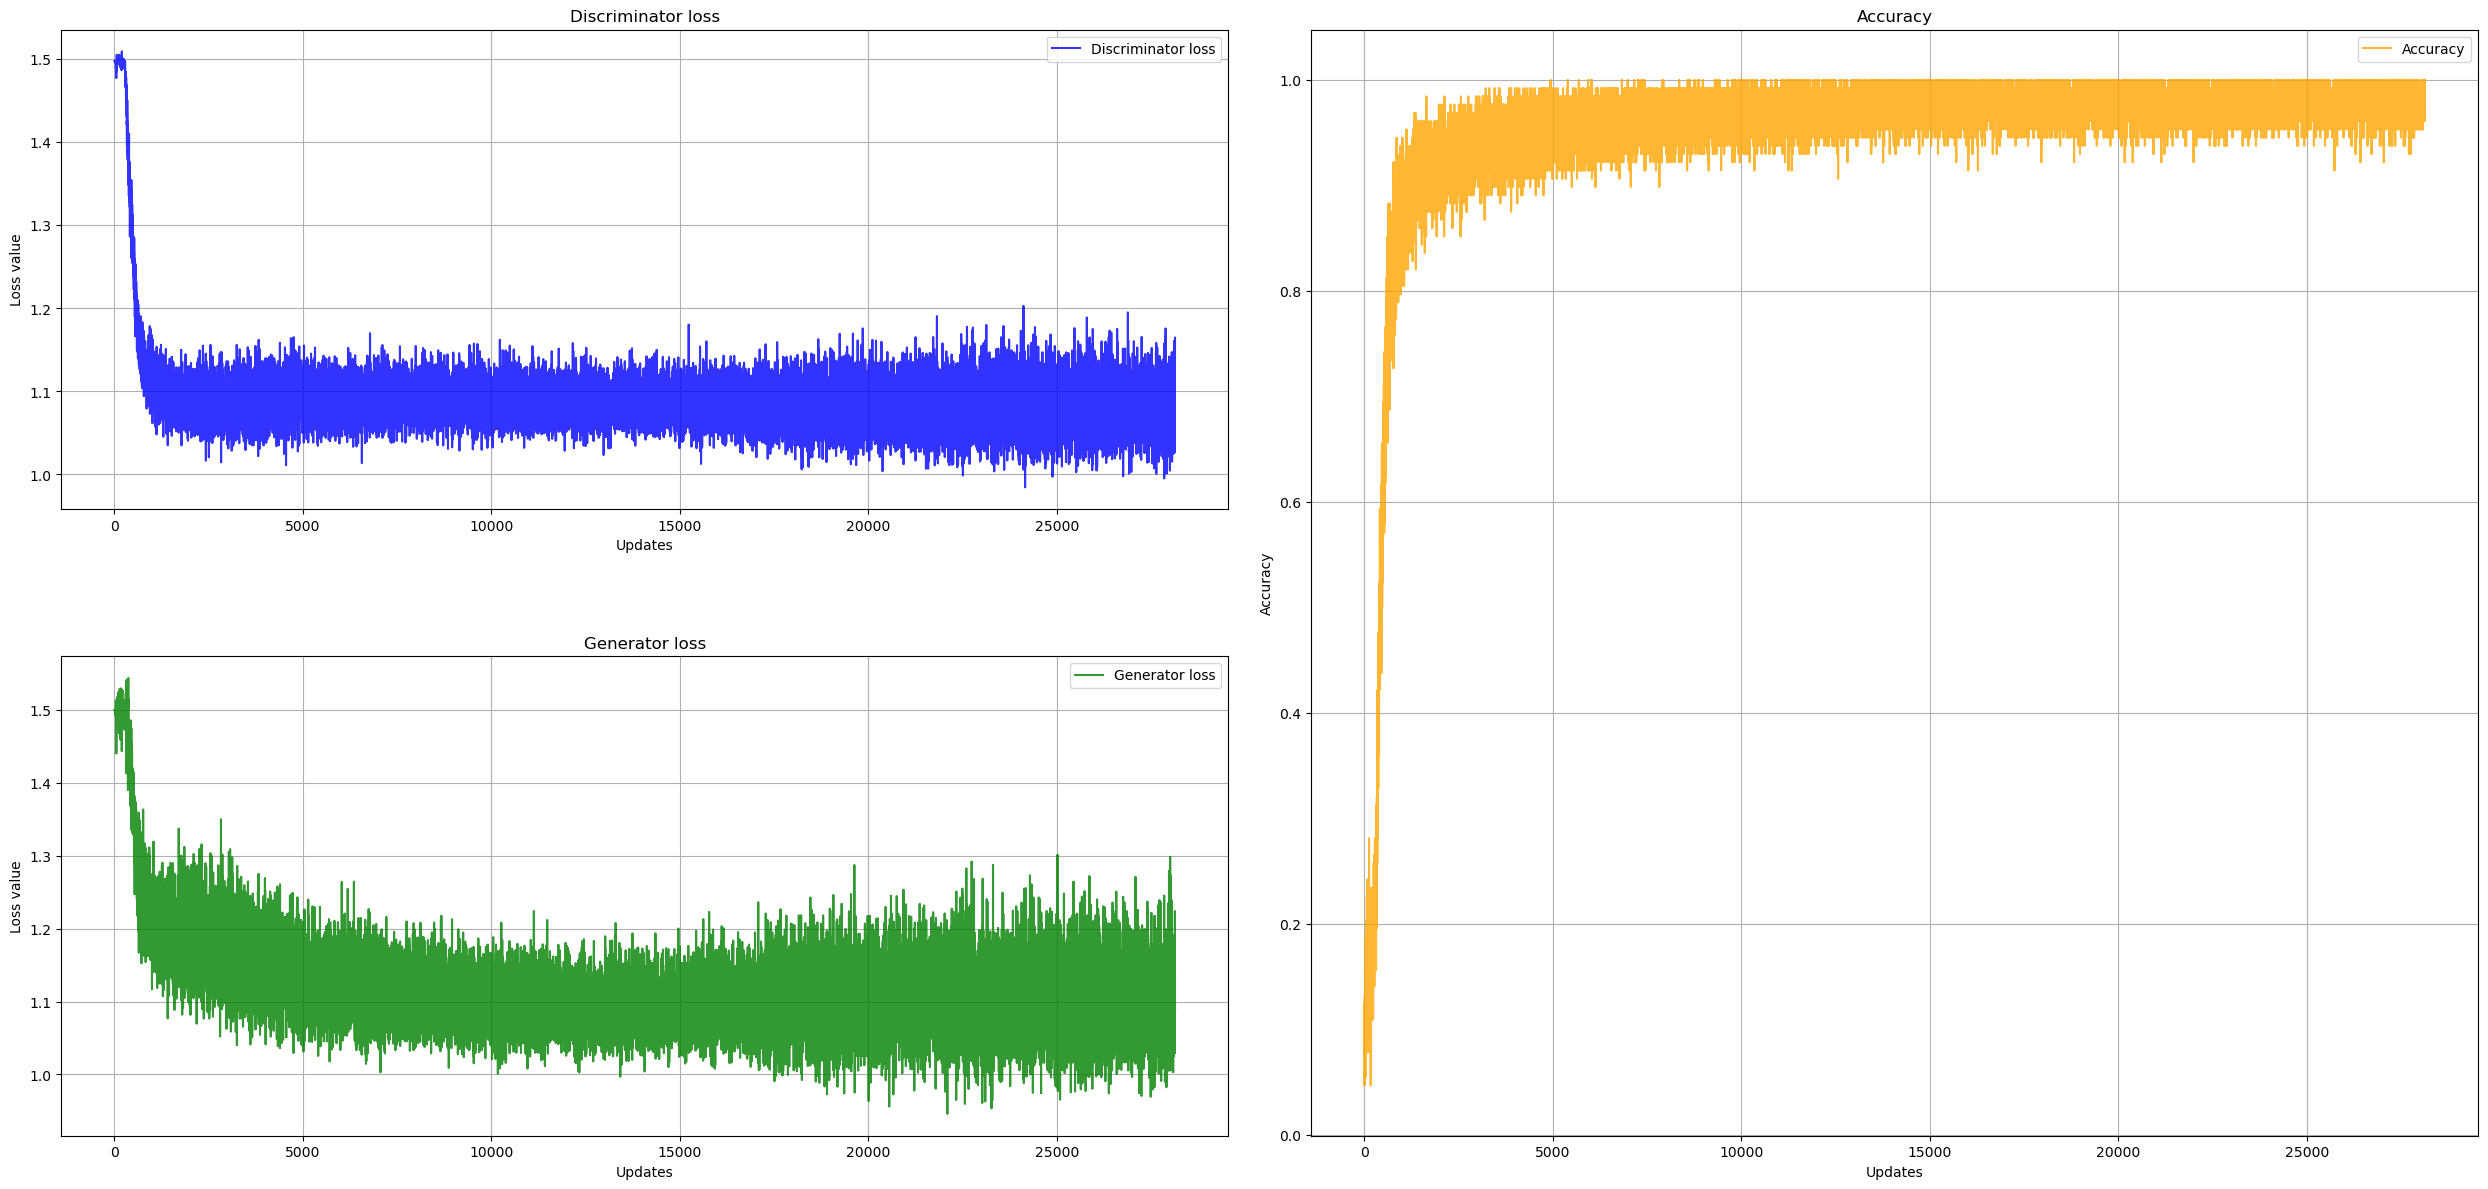

In [4]:
plot_history(history)

## Evaluate the architecture

As we can see, the model is able to generate quite well all digits.
In the following figure, we have an example of results. We identify *t* as a conditional input and *gen* as the number of examples to generate.

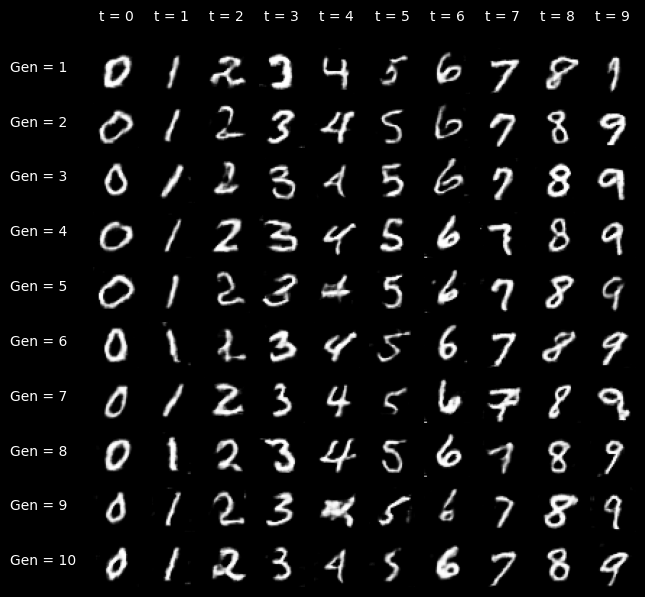

In [5]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])